# Scaling data

In [48]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder

plt.rcParams['figure.figsize'] = 20, 15
dic = {"size": 14}
matplotlib.rc('font', **dic)

In [5]:
df = pd.read_csv('processed_data/numerical.csv', index_col="EmployeeID")
y= df['Attrition_num']
X = df[df.columns.difference(['Attrition_num', 'Attrition'])]

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>,
        <AxesSubplot: title={'center': 'StockOptionLevel'}>],
       [<AxesSubplot: title={'center': 'TotalWorkingYears'}>,
        <AxesSubplot: title={'center': 'TrainingTimesLastYear'}>,
        <AxesSubplot: title={'center': 'YearsAtCompany'}>,
        <AxesSubplot: title={'center': 'YearsSinceLastPromotion'}>],
       [<AxesSubplot: title={'center': 'YearsWithCurrManager'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

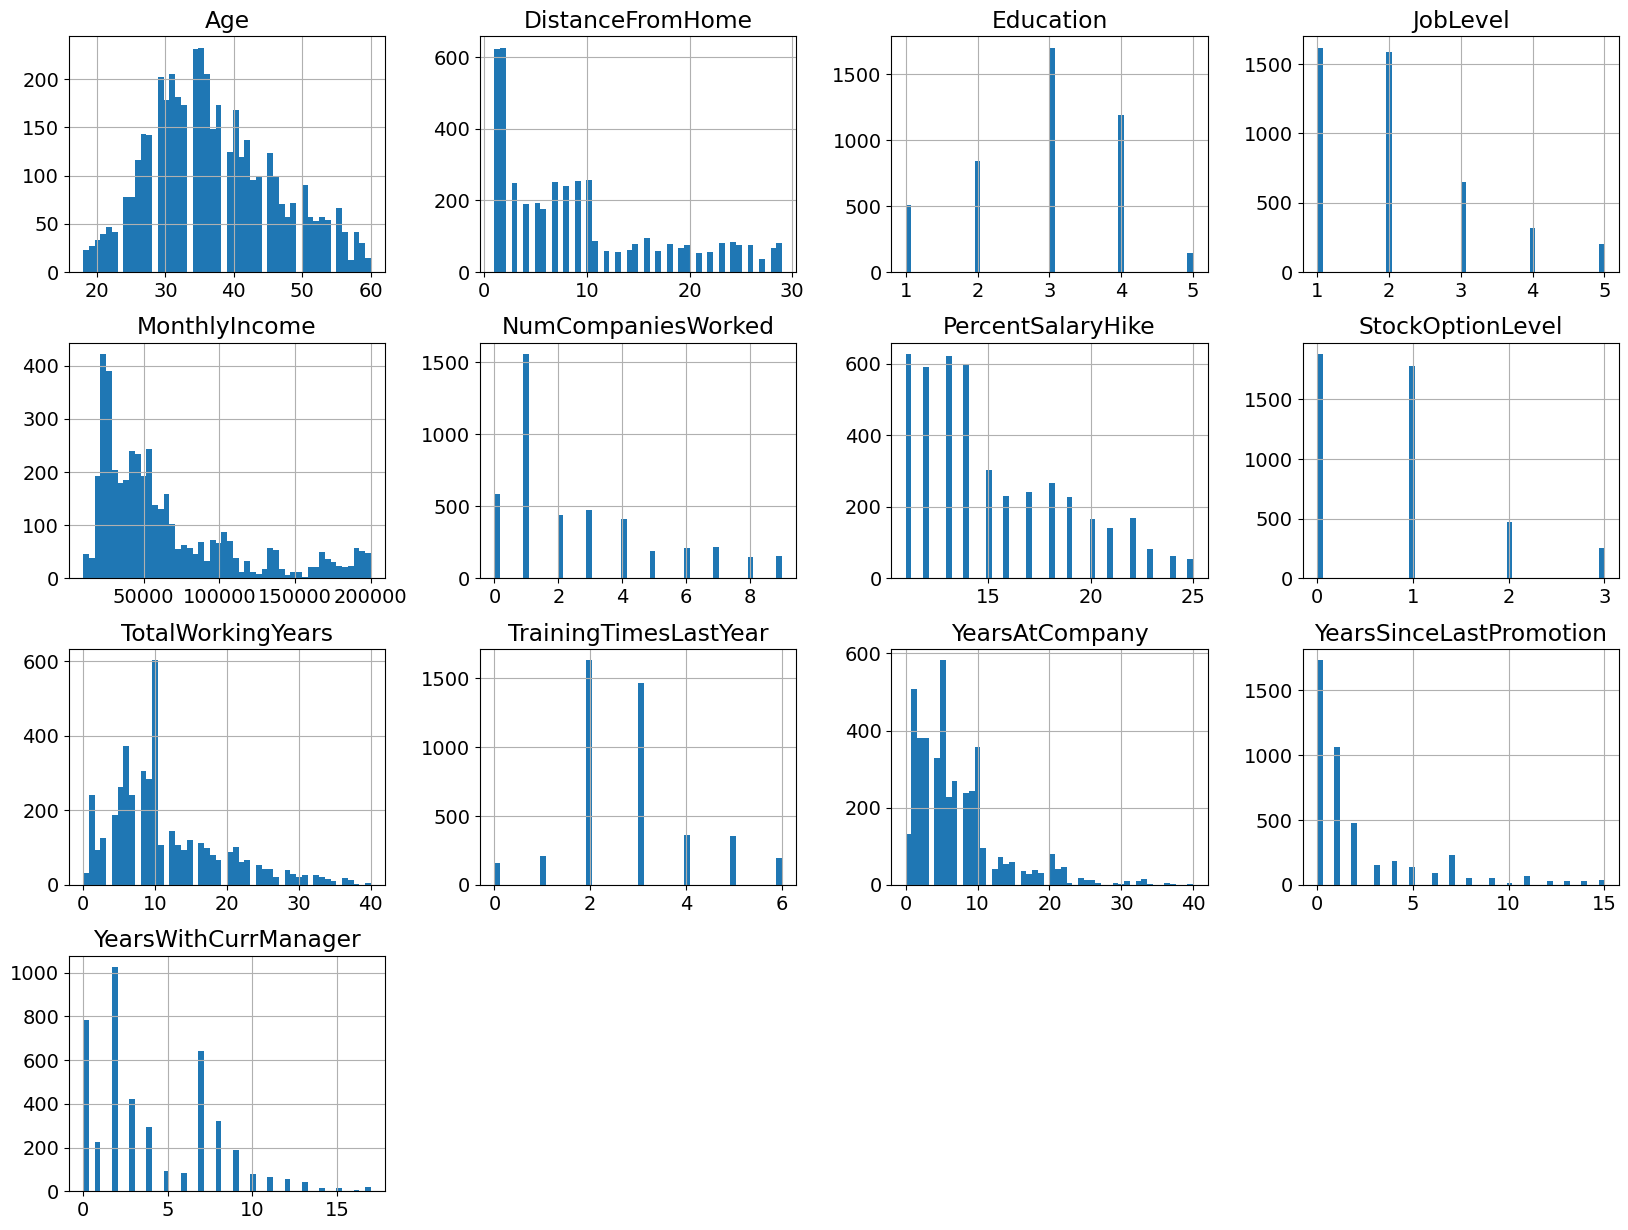

In [6]:
X.hist(bins=50)

In [7]:
#Test scaling data

In [9]:
test_arr=[1,2,3]
min_elemnt = 1
max_elemnt = 3
test_arr

[1, 2, 3]

In [10]:
denominator=max_elemnt-min_elemnt
[
    (test_arr[0] - (min_elemnt))/ denominator,
    (test_arr[1] - (min_elemnt))/ denominator,
    (test_arr[2] - (min_elemnt))/ denominator,
]

[0.0, 0.5, 1.0]

<AxesSubplot: >

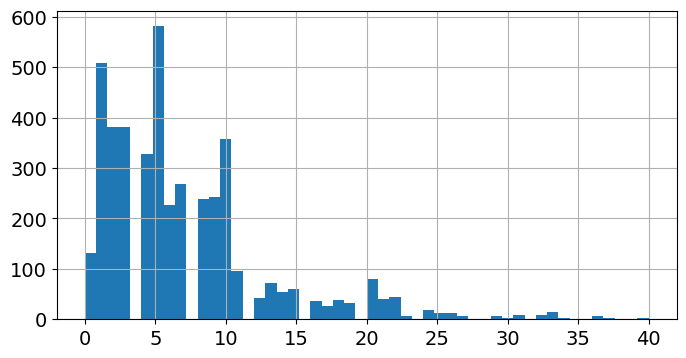

In [11]:
X.YearsAtCompany.hist(bins=50, figsize=(8, 4))

In [12]:
X.YearsAtCompany.head().values.reshape(-1, 1)

array([[1],
       [5],
       [5],
       [8],
       [6]], dtype=int64)

<AxesSubplot: >

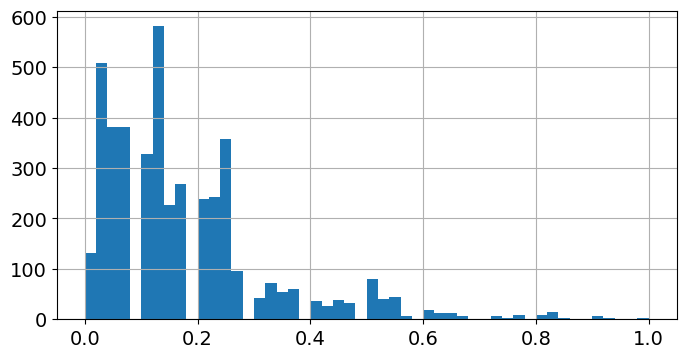

In [16]:
normalizer = MinMaxScaler()
result = normalizer.fit_transform(X.YearsAtCompany.values.reshape(-1, 1))
pd.Series(result.reshape(1, -1)[0]).hist(bins=50, figsize=(8, 4))

In [17]:
X.YearsAtCompany.values.reshape(-1, 1)

array([[1],
       [5],
       [5],
       ...,
       [3],
       [4],
       [9]], dtype=int64)

In [18]:
result

array([[0.025],
       [0.125],
       [0.125],
       ...,
       [0.075],
       [0.1  ],
       [0.225]])

In [19]:
X.YearsAtCompany.mean()

7.010497489730716

<AxesSubplot: >

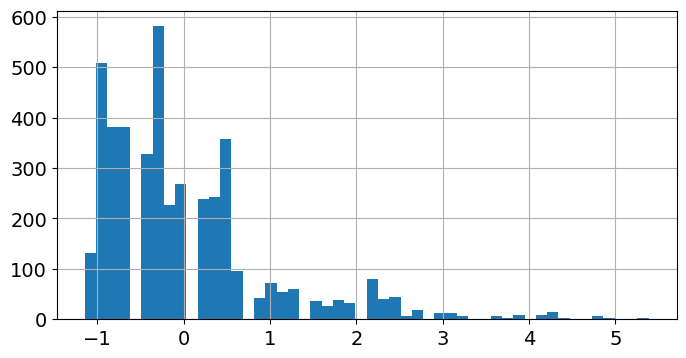

In [20]:
scaler = StandardScaler()
result = scaler.fit_transform(X.YearsAtCompany.values.reshape(-1, 1))
pd.Series(result.reshape(1, -1)[0]).hist(bins=50, figsize=(8, 4))

In [21]:
pd.Series(result.reshape(1, -1)[0]).mean()

1.4998905307578565e-17

In [22]:
#Scaling data for dataframe

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'DistanceFromHome'}>,
        <AxesSubplot: title={'center': 'Education'}>,
        <AxesSubplot: title={'center': 'JobLevel'}>],
       [<AxesSubplot: title={'center': 'MonthlyIncome'}>,
        <AxesSubplot: title={'center': 'NumCompaniesWorked'}>,
        <AxesSubplot: title={'center': 'PercentSalaryHike'}>,
        <AxesSubplot: title={'center': 'StockOptionLevel'}>],
       [<AxesSubplot: title={'center': 'TotalWorkingYears'}>,
        <AxesSubplot: title={'center': 'TrainingTimesLastYear'}>,
        <AxesSubplot: title={'center': 'YearsAtCompany'}>,
        <AxesSubplot: title={'center': 'YearsSinceLastPromotion'}>],
       [<AxesSubplot: title={'center': 'YearsWithCurrManager'}>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

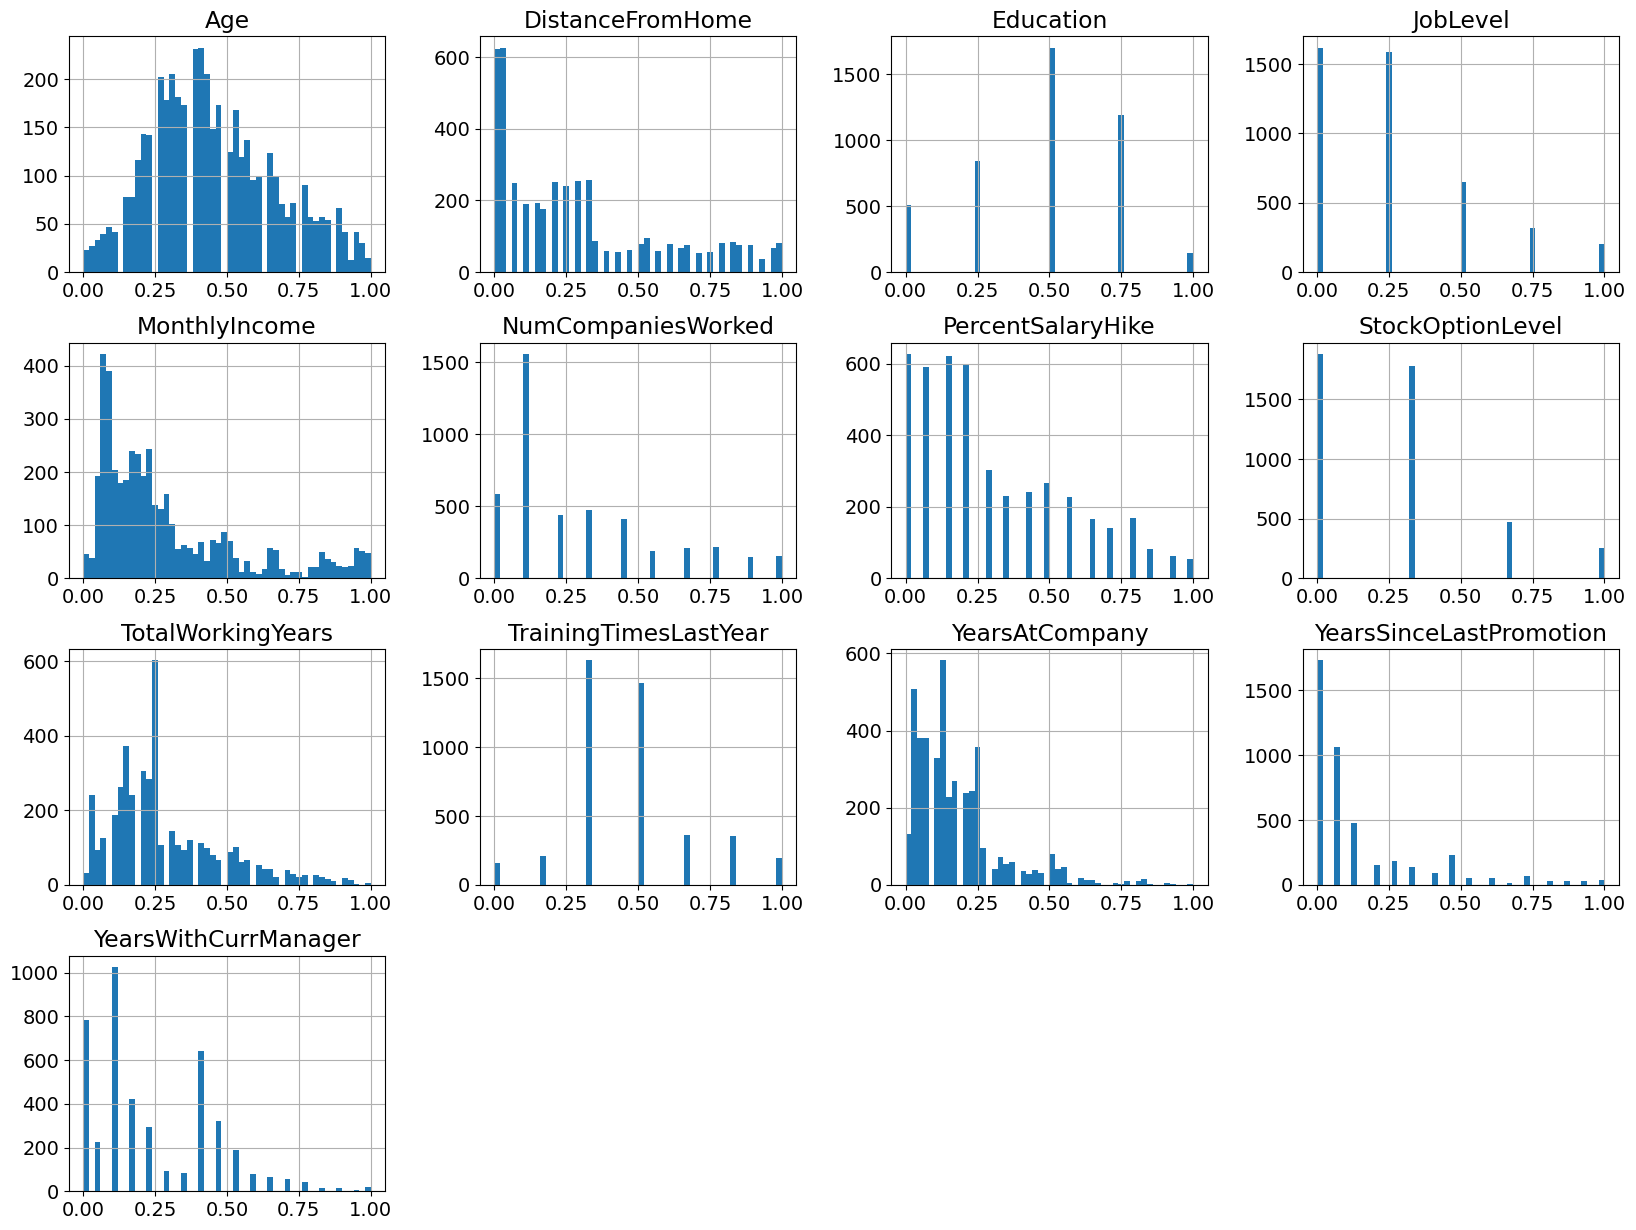

In [23]:
scaler = MinMaxScaler()
results= scaler.fit_transform(X)
X_scaled = pd.DataFrame(results, index=X.index, columns=X.columns)
X_scaled.hist(bins=50)

In [24]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
X_test

array([[ 0.1894241 ,  2.52016738, -1.82004548, ...,  2.05332706,
         3.77570771, -0.60702814],
       [-1.1931778 , -0.00995315, -1.82004548, ..., -0.68496274,
        -0.66183673, -0.60702814],
       [ 0.72119406,  1.38161314,  0.09040322, ..., -1.19839208,
        -0.66183673, -1.17579276],
       ...,
       [-0.55505385, -1.02200137, -1.82004548, ..., -0.85610586,
        -0.07016414, -0.60702814],
       [ 1.35931802, -0.13645918,  1.04562756, ...,  0.51303905,
        -0.36600043,  0.53050109],
       [-0.55505385,  1.50811917,  0.09040322, ..., -0.68496274,
        -0.66183673, -0.60702814]])

# Polynomial features

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [33]:
pf = PolynomialFeatures(3)
scaler = MinMaxScaler()

In [34]:
X_train_sc = scaler.fit_transform(X_train)
X_train_sc_pf = pf.fit_transform(X_train_sc)

X_test_sc = scaler.fit_transform(X_test)
X_test_sc_pf = pf.fit_transform(X_test_sc)

In [37]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_sc_pf, y_train)
y_pred = neigh.predict(X_test_sc_pf)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

0.9258836944127709
0.8371227066482541
0.8710509173813918
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       755
           1       0.71      0.80      0.75       122

    accuracy                           0.93       877
   macro avg       0.84      0.87      0.85       877
weighted avg       0.93      0.93      0.93       877



# Preprocessing data

In [39]:
df = pd.read_csv("data/general_data.csv", index_col='EmployeeID')
df.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)
df = df[~df.isna().apply(any, axis=1)]

In [40]:
cat_cols=list(df.dtypes[df.dtypes == 'object'].index.values)
cat_cols.remove('Attrition')

In [41]:
df_cat = df[cat_cols]
df_cat.shape

(4382, 7)

In [46]:
#Encoder test

In [43]:
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
EmployeeID,,,,,,,
1,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
2,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
3,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
4,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
5,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [45]:
encoder = LabelEncoder()
df_cat.apply(encoder.fit_transform).head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
EmployeeID,,,,,,,
1,2,2,1,0,0,1,0
2,1,1,1,0,6,2,0
3,1,1,4,1,7,1,0
4,0,1,1,1,1,1,0
5,2,1,3,1,7,2,0


In [47]:
#One head encoder test

In [49]:
encoder = OneHotEncoder(sparse=False)

In [51]:
result = encoder.fit_transform(df_cat)
pd.DataFrame(result, columns=encoder.get_feature_names_out())

C:\Kurzy\Pandas\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4378,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4379,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4380,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [52]:
encoder.fit_transform(df_cat)

C:\Kurzy\Pandas\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

# Prediction

In [69]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [54]:
# Simulate from beginning

In [70]:
df = pd.read_csv("data/general_data.csv", index_col='EmployeeID')
df.drop(['StandardHours', 'EmployeeCount'], axis=1, inplace=True)
df = df[~df.isna().apply(any, axis=1)]
cat_cols = list(df.dtypes[df.dtypes == 'object'].index.values)
cat_cols.remove('Attrition')
num_cols = list(df.dtypes[df.dtypes != 'object'].index.values)  + ["Attrition"]
num_cols.remove('Attrition')

In [71]:
scaler = MinMaxScaler()
polynomials = PolynomialFeatures(3)
encoder = OneHotEncoder(sparse=False)

In [72]:
X = df[df.columns.difference(['Attrition'])]
y = df.Attrition
X_train, X_test, y_traing, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
poly = polynomials.fit_transform(X_train[num_cols])
scaled = scaler.fit_transform(poly)
encoded = encoder.fit_transform(X_train[cat_cols])

print(f"numerical shape is {scaled.shape}")
print(f"categorical shape is {encoded.shape}")
X_train_proc = np.concatenate((scaled, encoded), axis=1)
X_train_proc.shape

numerical shape is (3505, 560)
categorical shape is (3505, 27)


C:\Kurzy\Pandas\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(3505, 587)

In [74]:
poly_test = polynomials.fit_transform(X_test[num_cols])
scaled_test = scaler.fit_transform(poly_test)
encoded_test = encoder.fit_transform(X_test[cat_cols])
print(f"numerical shape is {scaled_test.shape}")
print(f"categorical shape is {encoded_test.shape}")
X_test_proc = np.concatenate((scaled_test, encoded_test), axis=1)
X_test_proc.shape

numerical shape is (877, 560)
categorical shape is (877, 27)


C:\Kurzy\Pandas\env\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(877, 587)

In [90]:
y_test = y_test.astype('category').cat.codes
y_test

EmployeeID
680     0
2437    0
605     0
2649    0
1409    0
       ..
261     0
3996    1
1069    1
2962    0
3320    0
Length: 877, dtype: int8

In [91]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_proc, y_train)
y_pred = neigh.predict(X_test_proc)

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test,y_pred))

0.9304446978335233
0.8457733280725981
0.8805721420041255
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       755
           1       0.72      0.81      0.76       122

    accuracy                           0.93       877
   macro avg       0.85      0.88      0.86       877
weighted avg       0.93      0.93      0.93       877



# Feature selection

In [93]:
from sklearn.feature_selection import VarianceThreshold

In [104]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
X = df[df.columns.difference(['Attrition_num'])]
y = df['Attrition_num']

variance

In [102]:
variance = VarianceThreshold(threshold=.05)

In [108]:
X_sc = scaler.fit_transform(X)
print(X_sc.shape)
X_selected = variance.fit_transform(X_sc)
X_selected.shape


(4382, 13)


(4382, 7)

In [109]:
pd.DataFrame(X_sc, columns=list(X.columns)).var()

Age                        0.047330
DistanceFromHome           0.083798
Education                  0.065629
JobLevel                   0.076468
MonthlyIncome              0.061627
NumCompaniesWorked         0.077027
PercentSalaryHike          0.068457
StockOptionLevel           0.080731
TotalWorkingYears          0.037886
TrainingTimesLastYear      0.046182
YearsAtCompany             0.023481
YearsSinceLastPromotion    0.046225
YearsWithCurrManager       0.044092
dtype: float64

# Univariate feature selection

In [122]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



In [123]:
scaler = MinMaxScaler()
feature_selection = SelectKBest(f_classif, k= 4)

In [121]:
X_sc = scaler.fit_transform(X)
print(X_sc.shape)
X_selected = feature_selection.fit_transform(X_sc, y)
X_selected.shape

(4382, 13)


(4382, 4)

# Resursive feature eliminiation

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [111]:
scaler

MinMaxScaler()

In [126]:
feature_selection = RFE(LogisticRegression())

X_sc = scaler.fit_transform(X)
feature_selection = feature_selection.fit(X_sc, y)
print(feature_selection.support_)
print(feature_selection.ranking_)

X_sc = feature_selection.transform(X_sc)
X_sc.shape

[ True False False False False  True False False  True  True False  True
  True]
[1 8 3 7 2 1 5 6 1 1 4 1 1]


(4382, 6)

In [127]:
X.columns

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Cross validation

In [131]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
X = df[df.columns.difference(['Attrition_num'])]
y = df['Attrition_num']
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,  ConfusionMatrixDisplay

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



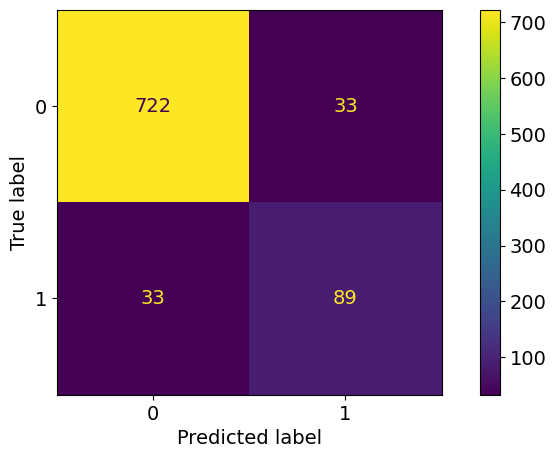

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

plt.rcParams["figure.figsize"] = 10, 5
print(f1_score(y_test, y_pred, average="micro"))
print(recall_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# K-fold cross validation

In [136]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh, X_train, y_train, cv=5)
scores

array([0.87161198, 0.86590585, 0.88873039, 0.85734665, 0.86447932])

In [137]:
scores = cross_val_score(neigh, X_train, y_train, cv=5, scoring="f1_macro")
scores

array([0.76757294, 0.74660052, 0.78492873, 0.70840266, 0.75032337])

# Leave one out

In [142]:
from sklearn.model_selection import LeaveOneOut

loo= LeaveOneOut()
X =X_train.values
y= y_train.values

y_pred =[]
y_true= []

for train_index, test_index in loo.split(X[:100]):
    print(train_index, test_index)
    neigh = KNeighborsClassifier(n_neighbors=3)
    X_temp_train, X_temp_test = X[train_index], X[test_index]
    y_temp_train, y_temp_test = y[train_index], y[test_index]
    neigh.fit(X_temp_train, y_temp_train)
    y_pred_one = neigh.predict(X_temp_test)
    y_pred.append(y_pred_one[0])
    y_true.append(y_temp_test[0])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26

In [143]:
y_true

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Grid Search

In [146]:
df = pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
y = df['Attrition_num']
X = df[df.columns.difference(["Attrition_num", 'Attrition'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [148]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print(f1_score(y_test, y_pred, average="micro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



In [149]:
# test Grid

In [151]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_dict = {
    "n_neighbors": list(range(2, 30, 1)),
    "p": [1, 2, 3]
}

grid = GridSearchCV(model, param_dict, cv=3, verbose=3, n_jobs=-1)
grid_finished = grid.fit(X_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


In [152]:
len(list(range(2, 30, 1)))

28

In [153]:
grid_finished.cv_results_

{'mean_fit_time': array([0.02316745, 0.02849658, 0.02250012, 0.02248947, 0.01898583,
        0.02098854, 0.0249842 , 0.0230147 , 0.02015797, 0.01932057,
        0.01949755, 0.02083445, 0.01898233, 0.01915677, 0.02431345,
        0.01932049, 0.01967033, 0.02065404, 0.01898805, 0.02033432,
        0.0203201 , 0.0243245 , 0.02033504, 0.02032097, 0.020341  ,
        0.02066143, 0.02098624, 0.02015535, 0.02232393, 0.01998727,
        0.01901023, 0.01965451, 0.01899441, 0.01966763, 0.01966047,
        0.02065349, 0.0189875 , 0.02016338, 0.02133266, 0.01950359,
        0.01932828, 0.01899489, 0.02582765, 0.02099919, 0.02331821,
        0.02133441, 0.02866149, 0.01965364, 0.02233656, 0.01999331,
        0.01900379, 0.01900983, 0.01966095, 0.02132877, 0.0184923 ,
        0.01900204, 0.02134911, 0.02131454, 0.01932081, 0.02183676,
        0.01849254, 0.02016187, 0.02065317, 0.01882521, 0.01901778,
        0.02034068, 0.02017069, 0.0201633 , 0.01932176, 0.01866484,
        0.01965451, 0.0200092 ,

In [154]:
grid_finished.best_estimator_

KNeighborsClassifier(n_neighbors=2, p=3)

In [155]:
best_knn = grid_finished.best_estimator_
y_pred = best_knn.predict(X_test)

print(f1_score(y_test, y_pred, average="micro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))

0.9600912200684151
0.9778481012658228
0.8565573770491803
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       755
           1       1.00      0.71      0.83       122

    accuracy                           0.96       877
   macro avg       0.98      0.86      0.90       877
weighted avg       0.96      0.96      0.96       877



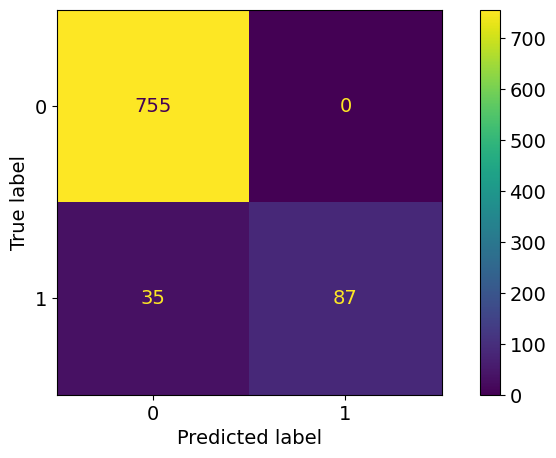

In [159]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)